In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os

from shared.utils import *
from shared.local_path import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

# Data Preprocessing
## Audio data

In [3]:
label = []
filepath = []

for classes in os.listdir(AUDIO_PATH):
    for file in os.listdir(os.path.join(AUDIO_PATH, classes)):
        file_path = os.path.join(AUDIO_PATH, classes, file)

        filepath.append(file_path)
        label.append(classes)

audio = pd.DataFrame({
    'filepath': filepath,
    'label': label,
})

audio.head()

,filepath,label
0,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
1,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
2,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
3,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry
4,E:\\Skripsi\data\audio\angry\03-01-05-01-01-01...,angry


In [4]:
le = LabelEncoder()
le.fit(audio['label'])
audio['label_encoded'] = le.transform(audio['label'])
num_classes = len(le.classes_)

In [5]:
with tf.device('/GPU:0'):
    audio['data'] = audio.filepath.apply(preprocess_audio)

C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=96
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1152
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1472
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1056
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1792
  warnings.warn(
C:\ProgramData\miniconda3\envs\tf\lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=320
  warnings.w

In [6]:
del filepath, label

In [7]:
x_audio = np.stack(audio['data'].values)
y_audio = audio['label_encoded'].values
print(x_audio.shape)
del audio

(27406, 128, 110, 3)


In [8]:
x_audio_train, x_temp, y_audio_train, y_temp = train_test_split(
    x_audio, y_audio, test_size=0.4, random_state=42, stratify=y_audio
)

x_audio_val, x_audio_test, y_audio_val, y_audio_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

del x_audio, y_audio
print(x_audio_train.shape)

(16443, 128, 110, 3)


In [9]:
x_audio_train.shape[0] == len(y_audio_train)

True

## Image data

In [10]:
filepath = []
label = []

i = 0
for classes in os.listdir(TRAIN_IMAGE_PATH):
    for file in os.listdir(os.path.join(TRAIN_IMAGE_PATH, classes)):
        path = os.path.join(TRAIN_IMAGE_PATH, classes, file)
        filepath.append(path)
        label.append(classes)

train_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(train_df.shape)
print(train_df['label'].unique())
train_df.head()

(28709, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


,filepath,label
0,E:\\Skripsi\data\new_data\train\angry\Training...,angry
1,E:\\Skripsi\data\new_data\train\angry\Training...,angry
2,E:\\Skripsi\data\new_data\train\angry\Training...,angry
3,E:\\Skripsi\data\new_data\train\angry\Training...,angry
4,E:\\Skripsi\data\new_data\train\angry\Training...,angry


In [11]:
filepath = []
label = []

i = 0
for classes in os.listdir(TEST_IMAGE_PATH):
    for file in os.listdir(os.path.join(TEST_IMAGE_PATH, classes)):
        path = os.path.join(TEST_IMAGE_PATH, classes, file)
        filepath.append(path)
        label.append(classes)

img_test_df = pd.DataFrame({
    'filepath': filepath,
    'label': label
})

del filepath, label

print(img_test_df.shape)
print(img_test_df['label'].unique())
img_test_df.head()

(7311, 2)
['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


,filepath,label
0,E:\\Skripsi\data\new_data\test\angry\Anger.jpg,angry
1,E:\\Skripsi\data\new_data\test\angry\Anger_1.jpg,angry
2,E:\\Skripsi\data\new_data\test\angry\Anger_10.jpg,angry
3,E:\\Skripsi\data\new_data\test\angry\Anger_11.jpg,angry
4,E:\\Skripsi\data\new_data\test\angry\Anger_12.jpg,angry


In [12]:
le = LabelEncoder()
le.fit(train_df['label'])
train_df['label_encoded'] = le.transform(train_df['label'])
img_test_df['label_encoded'] = le.transform(img_test_df['label'])

In [13]:
with tf.device('/GPU:0'):
    train_df['data'] = train_df['filepath'].apply(lambda x : preprocess_image(x, (100, 100)))
    img_test_df['data'] = img_test_df['filepath'].apply(lambda x : preprocess_image(x, (100, 100)))

In [14]:
train_df.shape

(28709, 4)

In [15]:
x_img = np.stack(train_df['data'].values)
y_img = train_df['label_encoded'].values

x_img_test = np.stack(img_test_df['data'].values)
y_img_test = img_test_df['label_encoded'].values

del train_df, img_test_df

In [16]:
x_img.shape[1:] == x_img_test.shape[1:]

True

In [17]:
x_img.shape

(28709, 100, 100, 3)

In [18]:
x_img_train, x_img_val, y_img_train, y_img_val = train_test_split(x_img, y_img, test_size=0.2, random_state=42, stratify=y_img)
del x_img, y_img

# Modeling

In [19]:
def create_base_model(instance_name, shape):
    base = tf.keras.applications.InceptionV3(
        include_top=False,
        pooling='max',
        weights='imagenet',
    )
    inputs = tf.keras.Input(shape=shape)
    outputs = base(inputs)
    return tf.keras.Model(inputs, outputs, name=f"inception_v3_{instance_name}")

In [20]:
input_image = tf.keras.layers.Input(shape=(100, 100, 3), name='input_image')
input_audio = tf.keras.layers.Input(shape=(128, 110, 3), name='input_audio')

input_img_shape = input_image.get_shape().as_list()
input_audio_shape = input_audio.get_shape().as_list()
image_features = create_base_model('image', tuple(input_img_shape[1:]))(input_image)
audio_features = create_base_model('audio', tuple(input_audio_shape[1:]))(input_audio)

feature = tf.keras.layers.Concatenate()([image_features, audio_features])

flat = tf.keras.layers.Flatten()(feature)

fc1 = tf.keras.layers.Dense(512, activation='relu')(flat)
fc2 = tf.keras.layers.Dense(512, activation='relu')(fc1)

out1 = tf.keras.layers.Dense(7, activation='softmax', name='image_class')(fc2)
out2 = tf.keras.layers.Dense(8, activation='softmax', name='audio_class')(fc2)

model = tf.keras.models.Model(inputs=[input_image, input_audio], outputs=[out1, out2])

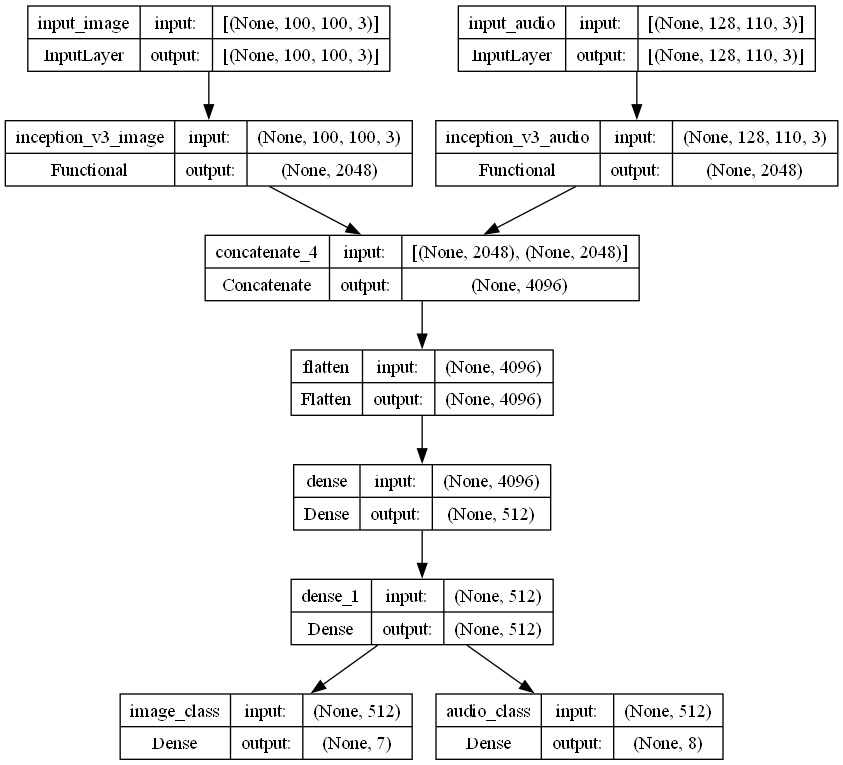

In [21]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
    loss={
        'image_class': 'sparse_categorical_crossentropy',
        'audio_class': 'sparse_categorical_crossentropy'
    },
    metrics={
        'image_class': 'accuracy',
        'audio_class': 'accuracy' 
    }
)

In [23]:
min_samples = min(len(x_img_train), len(x_audio_train), len(y_img_train), len(y_audio_train))

# Filter inputs and labels
x_img_train = x_img_train[:min_samples]
x_audio_train = x_audio_train[:min_samples]
y_img_train = y_img_train[:min_samples]
y_audio_train = y_audio_train[:min_samples]

# Print shapes after filtering
print("Input Image Shape:", x_img_train.shape) 
print("Input Audio Shape:", x_audio_train.shape)  
print("Image Labels Shape:", y_img_train.shape) 
print("Audio Labels Shape:", y_audio_train.shape)

Input Image Shape: (16443, 100, 100, 3)
Input Audio Shape: (16443, 128, 110, 3)
Image Labels Shape: (16443,)
Audio Labels Shape: (16443,)


In [24]:
print("Input Image Type:", x_img_train.dtype) 
print("Input Audio Type:", x_audio_train.dtype)  
print("Image Labels Type:", y_img_train.dtype) 
print("Audio Labels Type:", y_audio_train.dtype)

Input Image Type: uint8
Input Audio Type: float32
Image Labels Type: int32
Audio Labels Type: int32


In [25]:
min_samples = min(len(x_img_val), len(x_audio_val), len(y_img_val), len(y_audio_val))

# Filter inputs and labels
x_img_val = x_img_val[:min_samples]
x_audio_val = x_audio_val[:min_samples]
y_img_val = y_img_val[:min_samples]
y_audio_val = y_audio_val[:min_samples]


In [26]:
tf.keras.backend.clear_session()

In [27]:
class EarlyStop(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('loss') < .3:
            self.model.stop_training = True

In [28]:
with tf.device('/GPU:0'):
    history = model.fit(
        x=[x_img_train, x_audio_train],
        y=[y_img_train, y_audio_train], 
        validation_data=(
            [x_img_val, x_audio_val], 
            [y_img_val, y_audio_val]  
        ),
        callbacks=[EarlyStop()],
        epochs=50, 
        batch_size=32
    )


Epoch 1/50
514/514 [==============================] - ETA: 0s - loss: 3.1552 - image_class_loss: 1.7018 - audio_class_loss: 1.4534 - image_class_accuracy: 0.3151 - audio_class_accuracy: 0.4330

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [1]:
model.save('model.h5')

NameError: name 'model' is not defined

In [ ]:
def plot_and_save(metric_name, history, ylabel, filename):
    plt.figure()
    plt.plot(history.history[metric_name], label=f'Train {ylabel}')
    if f'val_{metric_name}' in history.history:
        plt.plot(history.history[f'val_{metric_name}'], label=f'Val {ylabel}')
    plt.title(f'{ylabel} over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.savefig(filename)
    plt.close()